In [113]:
import pandas as pd 
import numpy as np 
import psycopg2

In [ ]:

# 1️⃣ Connect using psycopg2 directly
conn = psycopg2.connect(
    dbname = "YOUR_DB_NAME",
    user = "YOUR_USERNAME",
    password = "YOUR_PASSWORD",
    host = "YOUR_HOST",
    port = "YOUR_PORT",
    sslmode="require
)

# 2️⃣ Write your SQL query
query = "SELECT * FROM luxsql.property_data;"

# 3️⃣ Read into pandas using the psycopg2 connection
df = pd.read_sql_query(query, conn)

# 4️⃣ Preview
print(df.head())

# 5️⃣ Close connection
conn.close()



C:\Users\USER\AppData\Local\Temp\ipykernel_8432\1076509644.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


    BedRooms   Bath rooms  Size_sqft  location  year built  Garage Available  \
0         3.0         1.0       1149     Rural        2004               NaN   
1         NaN         2.0       1169     Rural        1989               1.0   
2         4.0         3.0       1409  Suburban        1993               1.0   
3         3.0         3.0       1647  Suburban        2021               0.0   
4         2.0         3.0       1865     Urban        2009               0.0   

    Furnishing House Condition  Has_Pool  Lot Size  Price($)  
0  Unfurnished             new       0.0      0.15    244043  
1                          Old       0.0      0.23    211250  
2  Unfurnished              gd       0.0      0.19    257239  
3                          new       0.0      0.27    310316  
4     furnised             old       1.0      0.39    334791  


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    BedRooms         954 non-null    float64
 1   Bath rooms        941 non-null    float64
 2   Size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year built        1000 non-null   int64  
 5   Garage Available  896 non-null    float64
 6   Furnishing        1000 non-null   object 
 7   House Condition   1000 non-null   object 
 8   Has_Pool          945 non-null    float64
 9   Lot Size          1000 non-null   float64
 10  Price($)          1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [116]:
df.shape

(1000, 11)

In [117]:
df.describe()

,BedRooms,Bath rooms,Size_sqft,year built,Garage Available,Has_Pool,Lot Size,Price($)
count,954.000000,941.000000,1000.000000,1000.00000,896.000000,945.000000,1000.00000,1000.000000
mean,2.912998,1.989373,1505.170000,2001.59500,0.533482,0.280423,0.25540,277133.174000
std,1.161547,0.836592,391.257815,12.42511,0.499156,0.449444,0.13628,59963.752729
min,1.000000,1.000000,292.000000,1980.00000,0.000000,0.000000,0.00000,87752.000000
25%,2.000000,1.000000,1241.750000,1991.00000,0.000000,0.000000,0.15000,236922.250000
50%,3.000000,2.000000,1500.000000,2002.00000,1.000000,0.000000,0.25000,277263.500000
75%,4.000000,3.000000,1769.000000,2012.00000,1.000000,1.000000,0.35000,317508.250000
max,5.000000,4.000000,2777.000000,2023.00000,1.000000,1.000000,0.76000,481326.000000


In [118]:
# Removing whitespaces and capitalizing first letters of te column titles
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.capitalize()
)
print (df.columns)

Index(['Bedrooms', 'Bath_rooms', 'Size_sqft', 'Location', 'Year_built',
       'Garage_available', 'Furnishing', 'House_condition', 'Has_pool',
       'Lot_size', 'Price$'],
      dtype='object')


In [119]:
# Fill NaNs in Bedrooms with the median
df["Bedrooms"] = df["Bedrooms"].fillna(df["Bedrooms"].median())

In [120]:
# Fill NaNs in Bath_rooms with the median
df["Bath_rooms"] = df["Bath_rooms"].fillna(df["Bath_rooms"].median())

In [121]:
# Fill NaNs in Garage_available with the mode
df["Garage_available"] = df["Garage_available"].fillna(df["Garage_available"].mode()[0])

In [122]:
# Fill NaNs in Has_pool with the mode
df["Has_pool"] = df["Has_pool"].fillna(df["Has_pool"].mode()[0])

In [123]:
# Standardizing case, stripping spaces, correcting  and filling blank spaces if any in furnishing column
df["Furnishing"] = df["Furnishing"].str.strip().str.lower()

furnishing_map = {
    "": "unknown",            
    "furnised": "furnished",
    "furnished": "furnished",
    "semi furnished": "semi furnished",
    "semi-furnished": "semi furnished",
    "unfurnished": "unfurnished"
}
df["Furnishing"] = df["Furnishing"].replace(furnishing_map)
print(df["Furnishing"].unique())

['unfurnished' 'unknown' 'furnished' 'semi furnished']


In [124]:
# Standardizing case, stripping spaces, correcting  and filling blank spaces if any in location column
df["Location"] = df["Location"].str.strip().str.lower()
location_map = {
    "": "unknown",
    "rural": "rural",
    "ruraal": "rural",
    "suburban": "sub-urban",
    "sub-urban": "sub-urban",
    "urban": "urban",
    "urbn": "urban"
}
df["Location"] = df["Location"].replace(location_map)

print(df["Location"].unique())

['rural' 'sub-urban' 'urban']


In [125]:
# Standardizing case, stripping spaces and correcting 'House_condition' column
df['House_condition'] = df['House_condition'].str.lower().str.strip()
df['House_condition'] = df['House_condition'].replace({
    'gd': 'good',
    'old': 'old',
    'new': 'new'
})

# Display unique values after cleaning
print(df['House_condition'].unique())


['new' 'old' 'good']


In [126]:
#Encoding the House_condition column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['House_condition_encoded'] = le.fit_transform(df['House_condition'])

print(df[['House_condition', 'House_condition_encoded']].head())


  House_condition  House_condition_encoded
0             new                        1
1             old                        2
2            good                        0
3             new                        1
4             old                        2


In [127]:
#Encoding the location column
le = LabelEncoder()
df['Location_encoded'] = le.fit_transform(df['Location'])

print(df[['Location', 'Location_encoded']].head())


    Location  Location_encoded
0      rural                 0
1      rural                 0
2  sub-urban                 1
3  sub-urban                 1
4      urban                 2


In [128]:
#Encoding the furnishing column 
le = LabelEncoder()
df['Furnishing_encoded'] = le.fit_transform(df['Furnishing'])

print(df[['Furnishing', 'Furnishing_encoded']].head())

    Furnishing  Furnishing_encoded
0  unfurnished                   2
1      unknown                   3
2  unfurnished                   2
3      unknown                   3
4    furnished                   0


In [129]:
#Getting the age of the houses so we dont have to work with years
from datetime import datetime
current_year = datetime.now().year

# Create a new column 'House_age'
df['House_age'] = current_year - df['Year_built']

# Preview
print(df[['Year_built', 'House_age']].head())


   Year_built  House_age
0        2004         21
1        1989         36
2        1993         32
3        2021          4
4        2009         16


In [130]:
# Dropping the categorical and year columns because linear regression cannot work with text or word columns
df = df.drop(['House_condition', 'Location', 'Furnishing', 'Year_built'], axis=1)

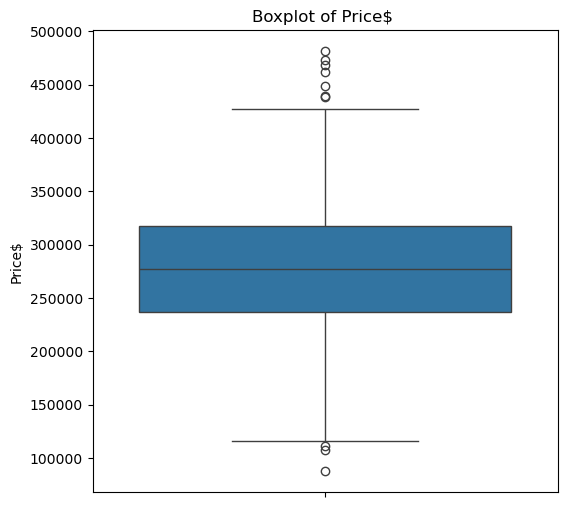

In [131]:
#visualizing the price column with the outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.boxplot(y=df['Price$'])
plt.title("Boxplot of Price$ ")
plt.show()

In [132]:
#Calculating and dropping outliers in the price column to avoid distorting the models's learning
Q1 = df['Price$'].quantile(0.25)
Q3 = df['Price$'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
price_outliers = df[(df['Price$'] < lower_bound) | (df['Price$'] > upper_bound)]
print("Number of outliers in Price$:", len(price_outliers))

# Removing outliers
df_clean = df[(df['Price$'] >= lower_bound) & (df['Price$'] <= upper_bound)]
print("Removed outliers:", df_clean.shape)


Number of outliers in Price$: 10
Removed outliers: (990, 11)


In [133]:
#Splitting data into training and testing parts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Features and target
X = df_clean.drop('Price$', axis=1)
y = df_clean['Price$']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
#Building and training the model to predict prices
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



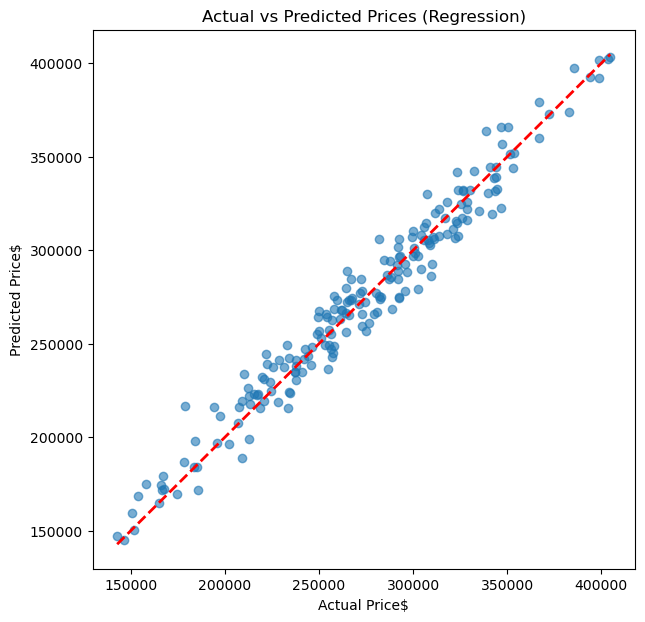

In [135]:
#Plotting a line of best fit for actual and predicted prices
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Price$")
plt.ylabel("Predicted Price$")
plt.title("Actual vs Predicted Prices (Regression)")
plt.show()


In [136]:
#Evaluating performance of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R²
r2 = r2_score(y_test, y_pred)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R² Score: 0.9621895574148615
MAE: 8789.4736307255
MSE: 121093068.03812408
RMSE: 11004.22955222782
